In [39]:
import cartopy.crs as ccrs
import cartopy
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

print(plt.style.available)
#plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = 8, 8


['Solarize_Light2', 'seaborn-pastel', 'dark_background', 'seaborn-poster', 'seaborn-dark-palette', 'fivethirtyeight', 'seaborn-darkgrid', 'ggplot', 'seaborn-talk', 'bmh', 'classic', 'seaborn-deep', 'seaborn-ticks', 'seaborn-muted', 'fast', 'seaborn-whitegrid', '_classic_test', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-dark', 'seaborn-bright', 'grayscale', 'seaborn-notebook', 'seaborn-white', 'seaborn']


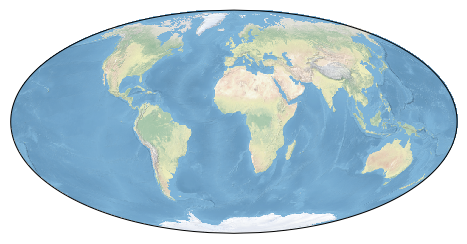

In [40]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

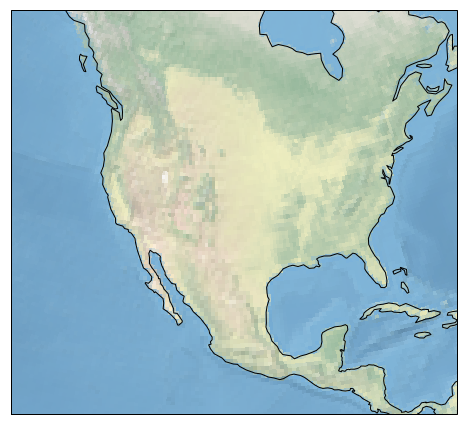

In [41]:
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-105, central_latitude=12))
ax.set_extent((-75,-130,60,10), crs=ccrs.Geodetic()) # (toprightx, bottomleftx, toprighty, bottomlefty)
ax.stock_img()
ax.coastlines()
plt.show()

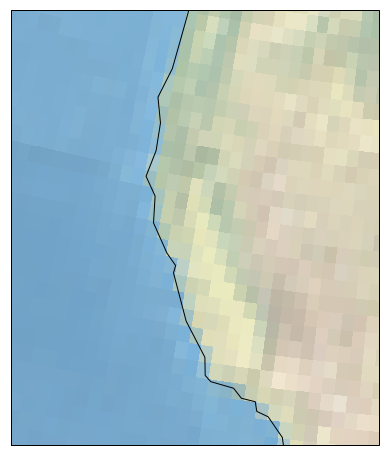

In [42]:
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-105, central_latitude=12))
ax.set_extent((-115,-128,45,33), crs=ccrs.Geodetic()) # (toprightx, bottomleftx, toprighty, bottomlefty)
ax.stock_img()
ax.coastlines()
plt.show()

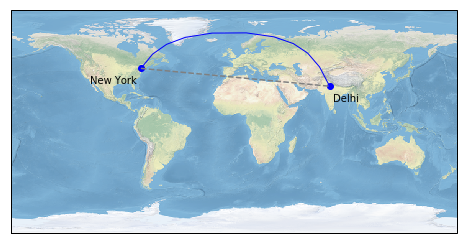

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=1, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()


# Reading shape files from Natural Earth

In [44]:
shpfilename = cartopy.io.shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = cartopy.io.shapereader.Reader(shpfilename)
countries = reader.records()
country = next(countries)
print(sorted(country.attributes.keys()))

['ABBREV', 'ABBREV_LEN', 'ADM0_A3', 'ADM0_A3_IS', 'ADM0_A3_UN', 'ADM0_A3_US', 'ADM0_A3_WB', 'ADM0_DIF', 'ADMIN', 'BRK_A3', 'BRK_DIFF', 'BRK_GROUP', 'BRK_NAME', 'CONTINENT', 'ECONOMY', 'FIPS_10_', 'FORMAL_EN', 'FORMAL_FR', 'GDP_MD_EST', 'GDP_YEAR', 'GEOUNIT', 'GEOU_DIF', 'GU_A3', 'HOMEPART', 'INCOME_GRP', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'LABELRANK', 'LASTCENSUS', 'LEVEL', 'LONG_LEN', 'MAPCOLOR13', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAX_LABEL', 'MIN_LABEL', 'MIN_ZOOM', 'NAME', 'NAME_ALT', 'NAME_CIAWF', 'NAME_LEN', 'NAME_LONG', 'NAME_SORT', 'NOTE_ADM0', 'NOTE_BRK', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'POSTAL', 'REGION_UN', 'REGION_WB', 'SOVEREIGNT', 'SOV_A3', 'SUBREGION', 'SUBUNIT', 'SU_A3', 'SU_DIF', 'TINY', 'TYPE', 'UN_A3', 'WB_A2', 'WB_A3', 'WIKIPEDIA', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'featurecla', 'scalerank']


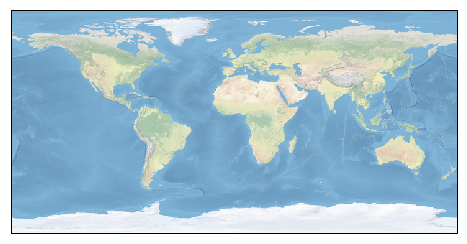

In [45]:
reader = cartopy.io.shapereader.Reader(shpfilename)

# define a function which returns the population given the country
population = lambda country: country.attributes['POP_EST']

# sort the countries by population and get the first 5 (least populated)
countries_by_pop = sorted(reader.records(), key=population)[:5]
', '.join([country.attributes['NAME_LONG'] for country in countries_by_pop])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
#for country in countries_by_pop:
#    ax.add_geometries(country.geometry, crs=None)

# Creating a Feature

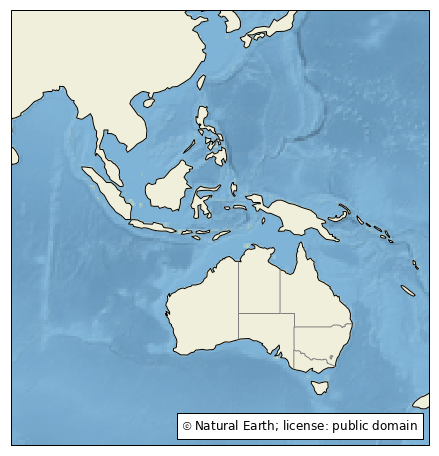

In [46]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([80, 170, -45, 30])

# Put a background image on for nice sea rendering.
ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cartopy.feature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray')

# Add a text annotation for the license information to the
# the bottom right corner.
text = mpl.offsetbox.AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': 12}, frameon=True)
ax.add_artist(text)

plt.show()

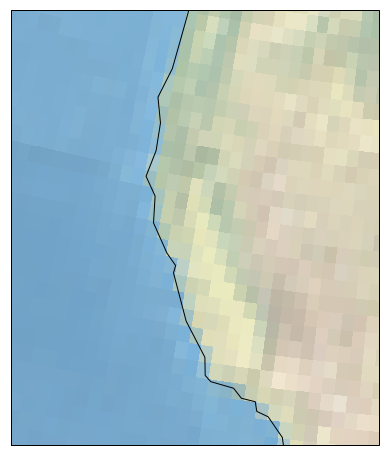

In [47]:
reader = cartopy.io.shapereader.Reader('/home/danny/Documents/gis/tl_2017_us_zcta510/tl_2017_us_zcta510.shp')
geos = reader.geometries()
geo = next(geos)

ax = plt.axes(projection=ccrs.AlbersEqualArea(central_longitude=-105, central_latitude=12))
ax.set_extent((-115,-128,45,33), crs=ccrs.Geodetic()) # (toprightx, bottomleftx, toprighty, bottomlefty)
ax.stock_img()
ax.coastlines()
ax.add_geometries(geo, crs=None)
plt.show()